In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_PER_SQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,225.000000
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,11114.277572
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,129.032258
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,155.056180
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3880.070547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,274.241298
4583,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,112.168812
4584,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,583.735652
4585,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,913.167939


In [17]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import numpy as np

In [6]:
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE),
    crs="EPSG:4326" 
)

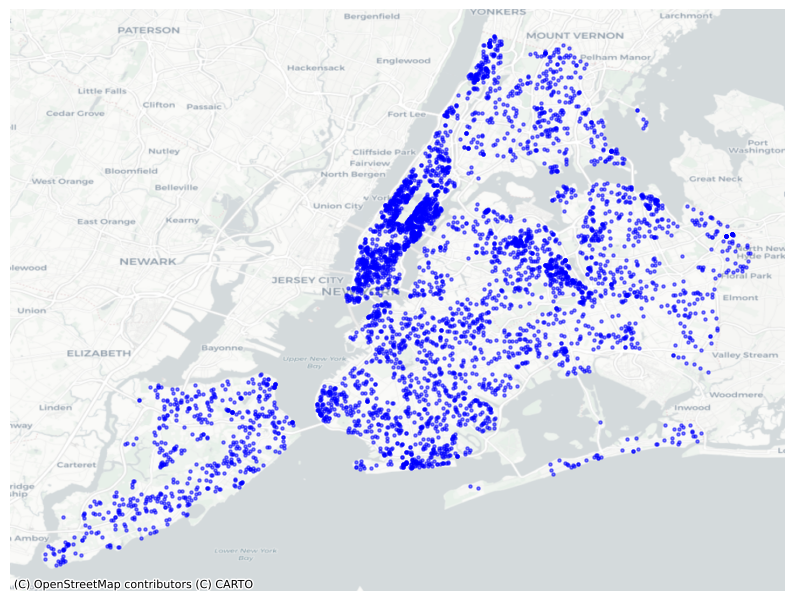

In [10]:
# Plotting
ax = gdf.plot(figsize=(10, 10), markersize=5, color='blue', alpha=0.5)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

In [22]:
data['PRICE']

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4582       599000
4583       245000
4584      1275000
4585       598125
4586       349000
Name: PRICE, Length: 4587, dtype: int64

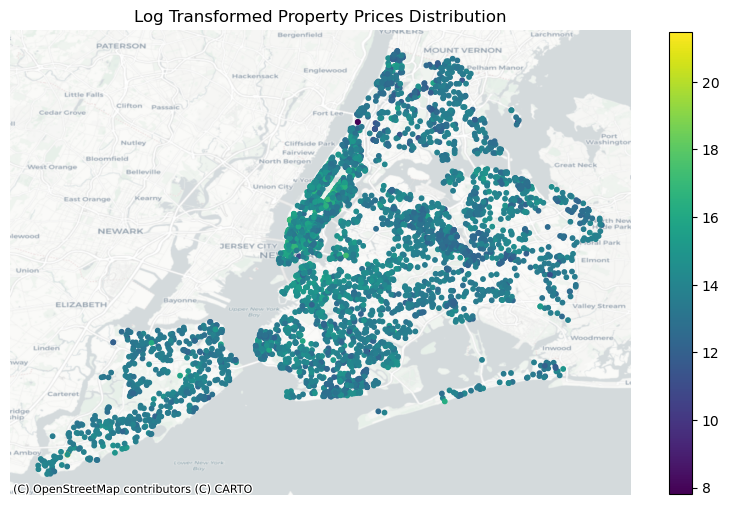

In [26]:
# Applying a logarithmic transformation to the 'PRICE' column for better visualization
gdf['log_PRICE'] = np.log(gdf['PRICE'] + 1) 

# Now plotting using the transformed prices
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=10, column='log_PRICE', cmap='viridis', legend=True, legend_kwds={'shrink': 0.6})
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Log Transformed Property Prices Distribution')
ax.set_axis_off()
plt.show()

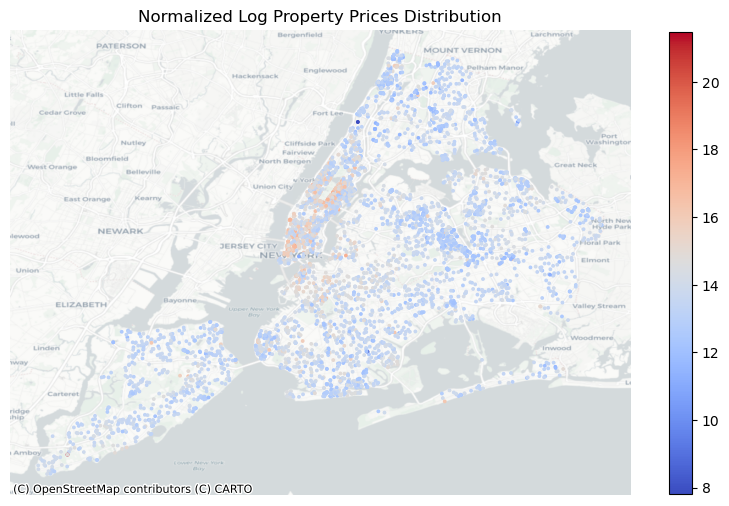

In [24]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin=gdf['log_PRICE'].min(), vmax=gdf['log_PRICE'].max())
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=3, column='log_PRICE', cmap='coolwarm', norm=norm, legend=True, legend_kwds={'shrink': 0.6})
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Normalized Log Property Prices Distribution')
ax.set_axis_off()
plt.show()

### Property type analysis

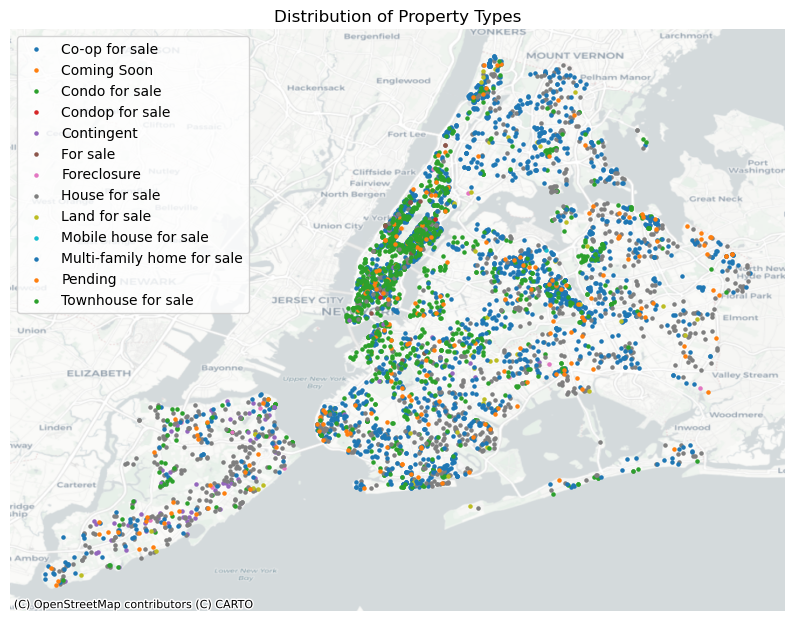

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
for dtype, data in gdf.groupby('TYPE'):
    data.plot(ax=ax, markersize=5, label=dtype)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.legend()
ax.set_title('Distribution of Property Types')
ax.set_axis_off()
plt.show()

### use heatmao to visualize high-density areas of expensive properties or certain types.

In [35]:
import geopandas as gpd
# Filter to include only properties above a certain price threshold
high_value_properties = data[data['PRICE'] > data['PRICE'].quantile(0.75)]  # Top 25% expensive properties

In [36]:
import folium
from folium.plugins import HeatMap

# Create a map centered around an average location
m = folium.Map(location=[high_value_properties['LATITUDE'].mean(), high_value_properties['LONGITUDE'].mean()], zoom_start=11)

In [37]:
# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in high_value_properties.iterrows()]
HeatMap(heat_data).add_to(m)

In [38]:
m